In [8]:
!pip install easyocr -q

In [5]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from PIL import Image
plt.style.use('ggplot')


In [6]:

csv_file='test.csv'
df = pd.read_csv(csv_file)

img_fns=[]
for j in range(135000):
    img_fns.append('Resource\\downloaded_images\\image_'+str(j)+'.jpg')


IndexError: index 49 is out of bounds for axis 0 with size 49

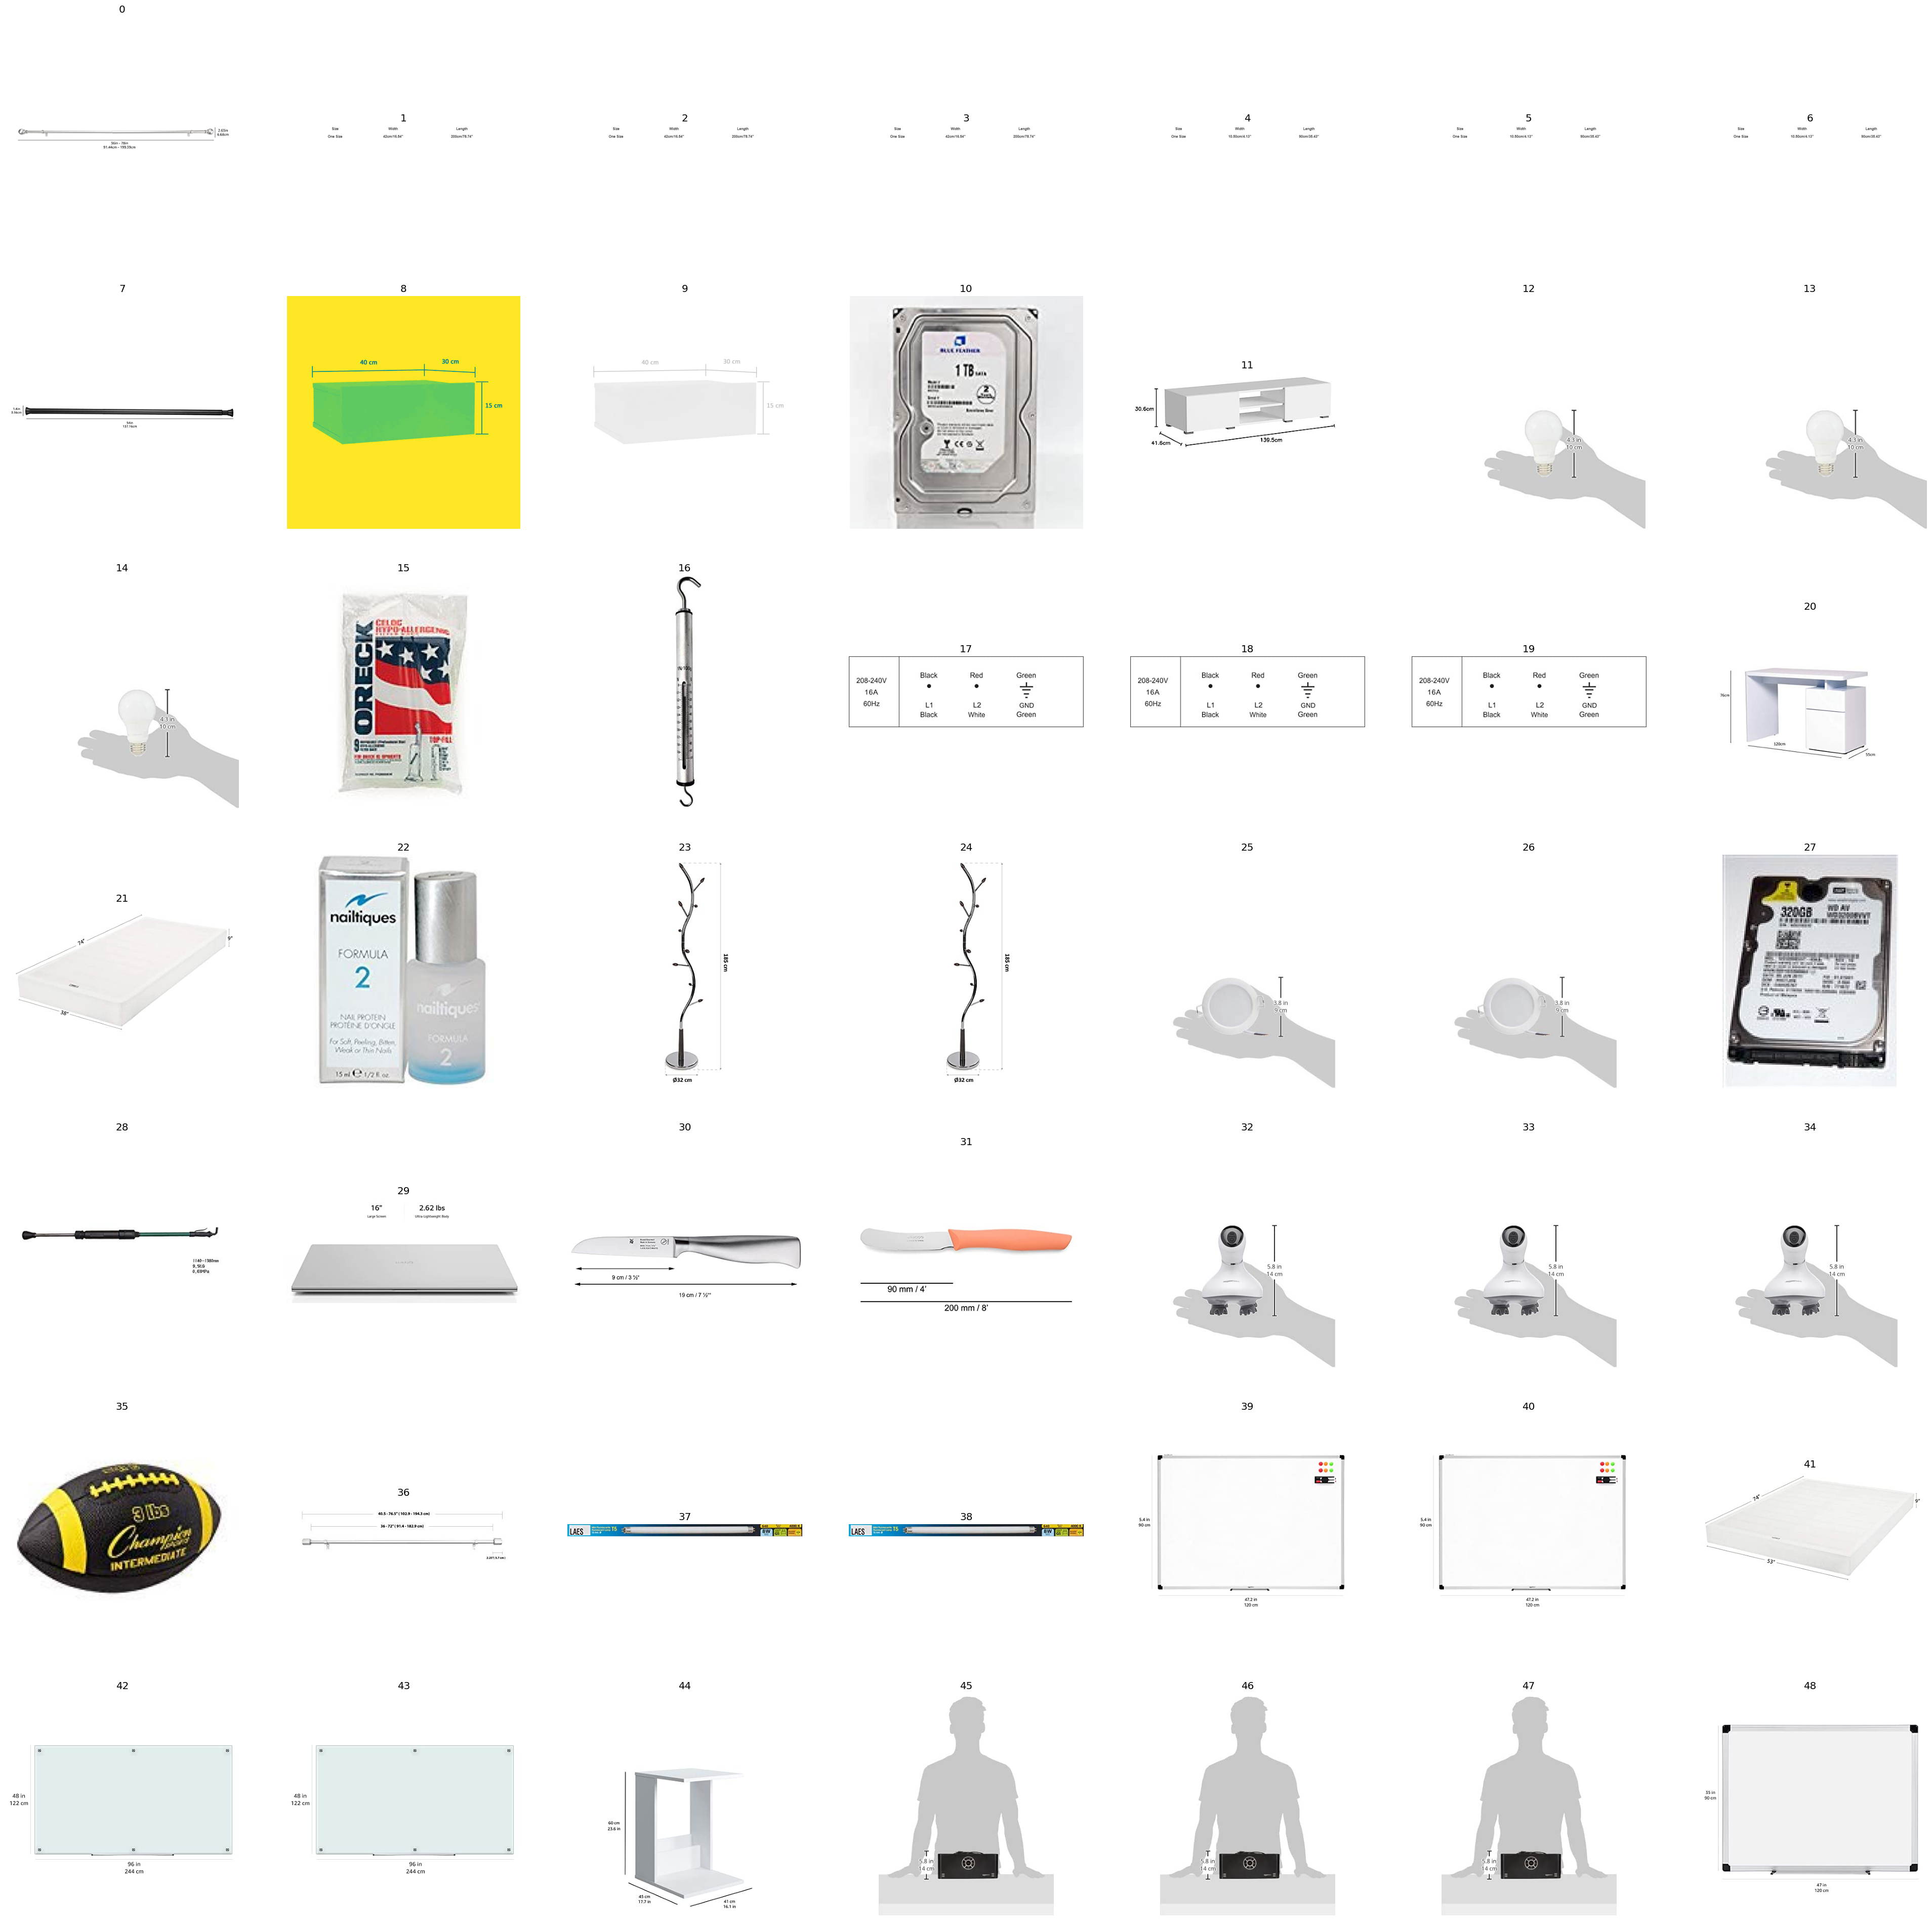

In [7]:
fig, axs = plt.subplots(7,7, figsize=(49, 49))
axs = axs.flatten()
for i in range(135000):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].split('.')[0].split('_')[-1]
    n_annot = len(df.query('index == @image_id'))
    axs[i].set_title(f'{image_id}')

In [21]:
df.query('index==@image_id')

,index,image_link,group_id,entity_name


In [3]:
# OCR Reading using easyocr
reader = easyocr.Reader(['en'])

results = []
for img in tqdm(img_fns[:num_images_to_show]):  # Limit to the number of images shown
    result = reader.readtext(img)
    
    # Extract the image ID
    img_id = os.path.basename(img).split('.')[0].split('_')[-1]
    
    # Concatenate detected text
    concatenated_text = ' '.join([res[1] for res in result])
    
    # Add results to the list
    results.append({'img_id': img_id, 'text': concatenated_text})

# Save the OCR results to CSV
img_df = pd.DataFrame(results)
img_df.to_csv('t_new.csv', index=False)

NameError: name 'easyocr' is not defined